# Chapter 3: Probability Distributions and Image Augmentation

## Binomial Distribution

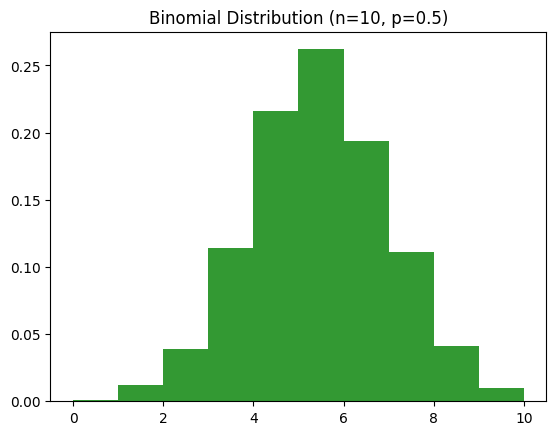

In [11]:

import numpy as np
import matplotlib.pyplot as plt

N = 1000
n = 10
p = 0.5
P1 = np.random.binomial(n, p, N)

plt.figure()
plt.hist(P1, density=True, alpha=0.8, histtype='bar', color='green', ec='black')
plt.title('Binomial Distribution (n=10, p=0.5)')
plt.show()


## Normal Distribution

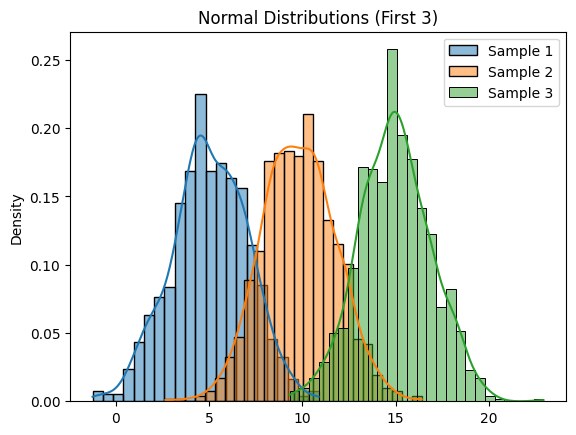

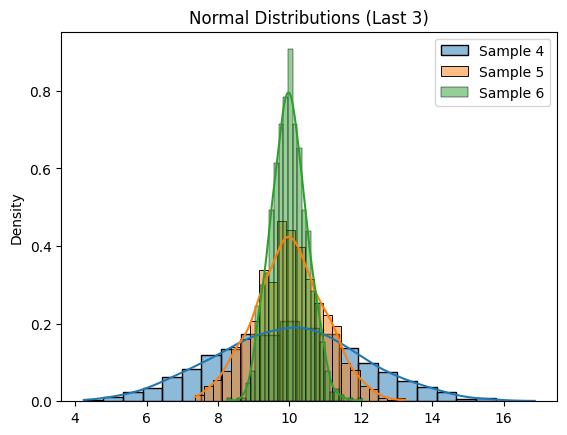

In [12]:

import seaborn as sns

mu_sigma_pairs = [(5, 2), (10, 2), (15, 2), (10, 2), (10, 1), (10, 0.5)]
samples = [np.random.normal(mu, sigma, 1000) for mu, sigma in mu_sigma_pairs]

plt.figure()
for i, sample in enumerate(samples[:3]):
    sns.histplot(sample, stat="density", kde=True, label=f'Sample {i+1}')
plt.legend()
plt.title('Normal Distributions (First 3)')
plt.show()

plt.figure()
for i, sample in enumerate(samples[3:]):
    sns.histplot(sample, stat="density", kde=True, label=f'Sample {i+4}')
plt.legend()
plt.title('Normal Distributions (Last 3)')
plt.show()


## Power Analysis

Sample Size (to achieve 80% power): 33.37
Power for sample size 33: 0.80


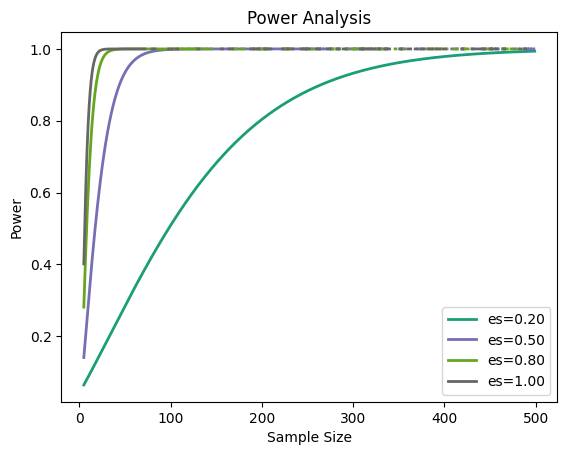

In [13]:

import statsmodels.stats.power as ssp

stat_power = ssp.TTestPower()

sample_size = stat_power.solve_power(effect_size=0.5, nobs=None, alpha=0.05, power=0.8)
print(f'Sample Size (to achieve 80% power): {sample_size:.2f}')

power = stat_power.solve_power(effect_size=0.5, nobs=33, alpha=0.05, power=None)
print(f'Power for sample size 33: {power:.2f}')

effect_sizes = np.array([0.2, 0.5, 0.8, 1])
sample_sizes = np.arange(5, 500)

stat_power.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Analysis')
plt.show()


## Uniform Distribution

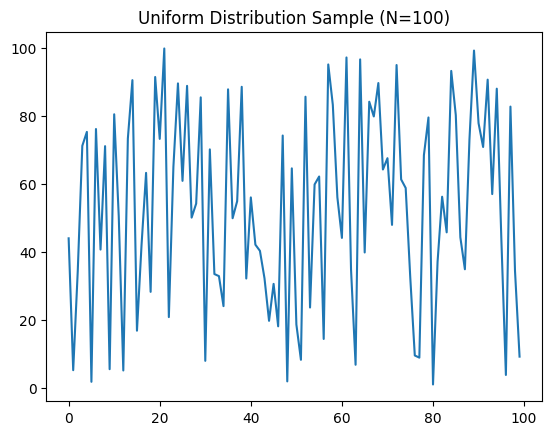

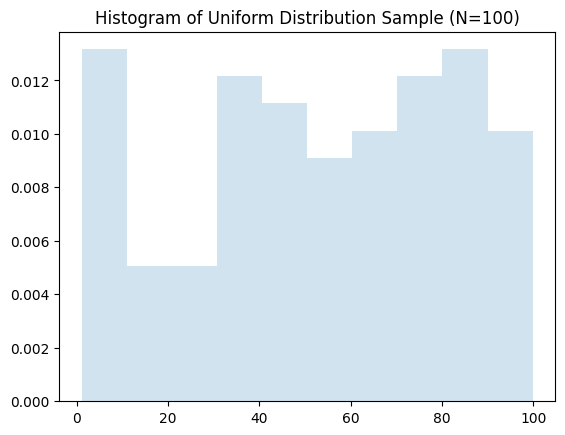

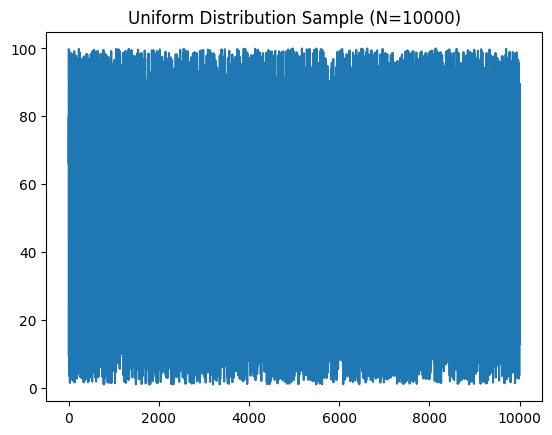

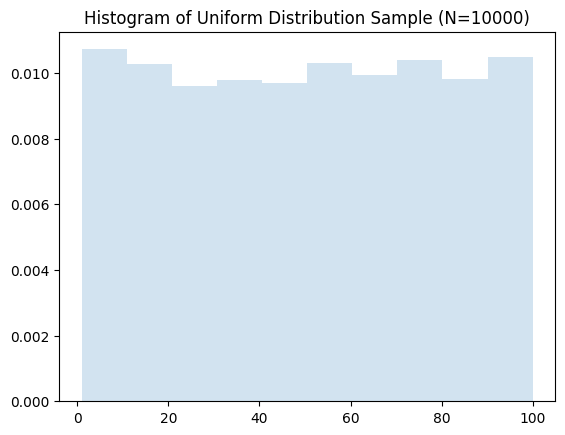

In [14]:

a, b = 1, 100
N = 100
X1 = np.random.uniform(a, b, N)

plt.figure()
plt.plot(X1)
plt.title('Uniform Distribution Sample (N=100)')
plt.show()

plt.figure()
plt.hist(X1, density=True, histtype='stepfilled', alpha=0.2)
plt.title('Histogram of Uniform Distribution Sample (N=100)')
plt.show()

N = 10000
X2 = np.random.uniform(a, b, N)

plt.figure()
plt.plot(X2)
plt.title('Uniform Distribution Sample (N=10000)')
plt.show()

plt.figure()
plt.hist(X2, density=True, histtype='stepfilled', alpha=0.2)
plt.title('Histogram of Uniform Distribution Sample (N=10000)')
plt.show()


## Image Augmentation

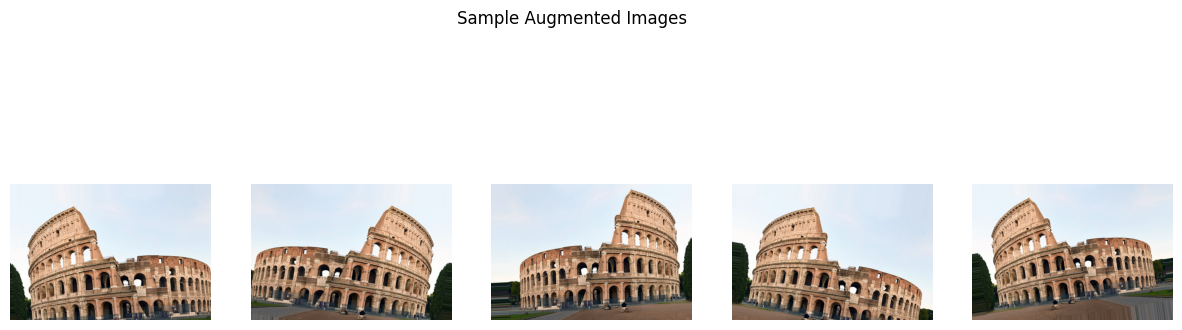

In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# URL of the image on GitHub
img_url = 'https://raw.githubusercontent.com/elwarfalli/MSE-1500-Simulation-Modeling-with-Python/main/colosseum.jpg'

# Download and load the image
response = requests.get(img_url)
img = Image.open(BytesIO(response.content)).convert('RGB')  # Ensure it's RGB

# Convert image to array and reshape for ImageDataGenerator
x = img_to_array(img)
x = x.reshape((1,) + x.shape)  # Shape should be (1, height, width, 3)

# Define the image data generator
image_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Display first 5 augmented images
plt.figure(figsize=(15, 5))
i = 0
for batch in image_gen.flow(x, batch_size=1):
    plt.subplot(1, 5, i + 1)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    i += 1
    if i >= 5:
        break

plt.suptitle('Sample Augmented Images')
plt.show()
